## 変分問題を深層展開で解く

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル変数の設定

In [12]:
δ = 0.05
β = 20.0
N = 100
T = 1.0
λ = 1000.0
train_itr = 300

300

### 放射基底関数の準備

In [3]:
function rbf_func(x, θ)
    rbf(x, β) = exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

rbf_func (generic function with 1 method)

In [4]:
function d_rbf_func(x, θ)
    d_rbf(x, β) = -2β*x*exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*d_rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

d_rbf_func (generic function with 1 method)

### 放射基底関数のプロット例

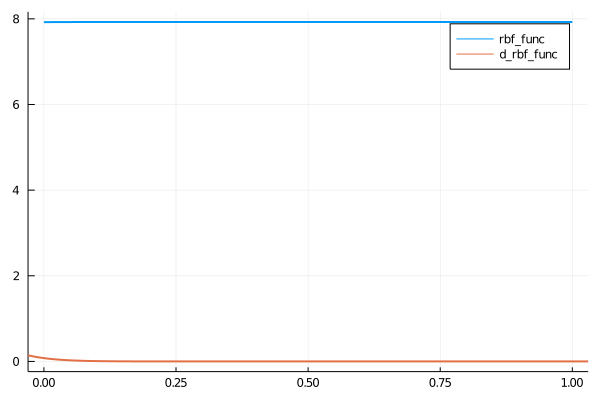

In [6]:
# example
θ = ones(50)
plot(x->rbf_func(x, θ),  lw=2, xlims=[0,1],label="rbf_func")
plot!(x->d_rbf_func(x, θ),  lw=2, label="d_rbf_func")

### 微分可能数値積分モジュール

In [10]:
function Integrate(T, N, θ, λ)
    dt = T/N
    s = 0.0
    for i in 1:N
        y = rbf_func(i*dt, θ)      
        y′ = d_rbf_func(i*dt, θ)
        F = -(y^2 - y′^2 + y*i*dt)
        s += F*dt # loss function 
    end
    s = s + λ*(rbf_func(0, θ) - 0.0)^2 + λ*(rbf_func(1, θ) - 0.0)^2　
    return s
end


Integrate (generic function with 1 method)

### 学習プロセス

In [13]:
opt = ADAM(1.0) 
θ_train = ones(50)
ps = Flux.params(θ_train)
function train(T, N, θ, ps)
    for i in 1:train_itr
        gs = gradient(ps) do
            Integrate(T, N, θ, λ)
        end
        Flux.Optimise.update!(opt, ps, gs)
        println(Integrate(T, N, θ, λ))
    end
end

train (generic function with 1 method)

In [14]:
train(T, N, θ_train, ps)

-3.578342670169109e-11
56368.5969348514
69562.82776566184
30169.242995795194
1477.8676195549947
8318.905777998776
29728.544482821333
34980.51387991631
21004.33935661038
4596.211104837459
388.83546475293963
8631.014155393705
17595.87329362666
17433.60550040598
9307.92912334755
1530.3245320538044
539.5009636244961
5414.881608488398
9855.57468003815
9157.330104884539
4452.653168308891
502.9452843877928
577.313178017555
3558.9077885454544
5675.551385902048
4675.88647135009
1826.262575971799
51.85711931045952
742.8572631566462
2565.345681489438
3242.382105097422
2087.113755786987
470.9718527414278
45.424787837044626
934.295064747296
1825.2396917213382
1626.8845710922315
642.8061683183814
12.85734312280357
302.39705056303734
946.5508942647319
1071.1094794682062
554.9298716092596
52.637705563164914
100.9718419238002
497.9444514651997
659.699863063651
388.4918285653506
53.015016740282256
43.886925763619345
284.3487145823939
399.9764825777857
239.43084177165844
31.43162470766212
29.795504279907

### DU-RR法による数値解と厳密解の比較

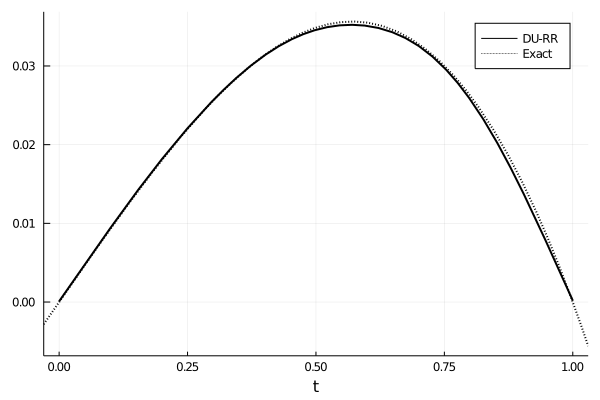

In [17]:
plot(x->rbf_func(x, θ_train),  lw=2, xlims=[0,1],label="DU-RR", xlabel="t",color=:black)
plot!(x->sin(x)/(2*sin(1.0)) - x/2, lw=2, label="Exact",color=:black, ls=:dot)

In [16]:
savefig("DU-RR.pdf")